## Exploratory df Analysis - US Accidents 2019 

In [25]:
# Import Packages and DataSet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the dfSet
df = pd.read_parquet('../data/raw/US_Accidents_2019_for_EDA.parquet')

# Display first 3 lines of the Dataset
df.head(3)

,source,severity,starttime,startlat,startlng,street,city,county,state,zipcode,...,trafficsignal,sunrisesunset,civiltwilight,nauticaltwilight,astronomicaltwilight,year,month,day,hour,weekday
0,Source2,3,2019-12-26 17:09:52,40.884850,-95.800362,I-29 S,Thurman,Fremont,IA,51654,...,0,Night,Day,Day,Day,2019,Dec,26,17,Thu
1,Source2,3,2019-12-26 17:10:32,40.889641,-95.798630,I-29 N,Thurman,Fremont,IA,51654,...,0,Night,Day,Day,Day,2019,Dec,26,17,Thu
2,Source2,3,2019-12-31 23:49:36,42.313499,-83.091225,Fisher Fwy W,Detroit,Wayne,MI,48209,...,0,Night,Night,Night,Night,2019,Dec,31,23,Tue


We have 38 Variables after a pre-clean on Descriptive Analysis.

Our Target Variable is 'severity'

In [26]:
# Check the Shape of the Dataset

df.shape

(954302, 43)

In [27]:
# Understand the DataSet Features

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954302 entries, 0 to 954301
Data columns (total 43 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   source                954302 non-null  object        
 1   severity              954302 non-null  int64         
 2   starttime             954302 non-null  datetime64[ns]
 3   startlat              954302 non-null  float64       
 4   startlng              954302 non-null  float64       
 5   street                954302 non-null  object        
 6   city                  954283 non-null  object        
 7   county                954302 non-null  object        
 8   state                 954302 non-null  object        
 9   zipcode               953988 non-null  object        
 10  timezone              952879 non-null  object        
 11  airportcode           952067 non-null  object        
 12  weathertimestamp      942676 non-null  object        
 13 

#### Clean the Duplicates

In [28]:
# Count the number of duplicates before removing them
num_duplicates = df.duplicated().sum()

# Remove duplicates from the entire dfFrame
df_without_duplicates = df.drop_duplicates()

# Print the number of duplicates and the shape of the DataFrame
print('Number of duplicates before removing:', num_duplicates)
print('Shape before removing duplicates:', df.shape)
print('Shape after removing duplicates:', df_without_duplicates.shape)

Number of duplicates before removing: 4890
Shape before removing duplicates: (954302, 43)
Shape after removing duplicates: (949412, 43)


## Univariate Data Analysis

#### Univariate Categorical Data Analysis

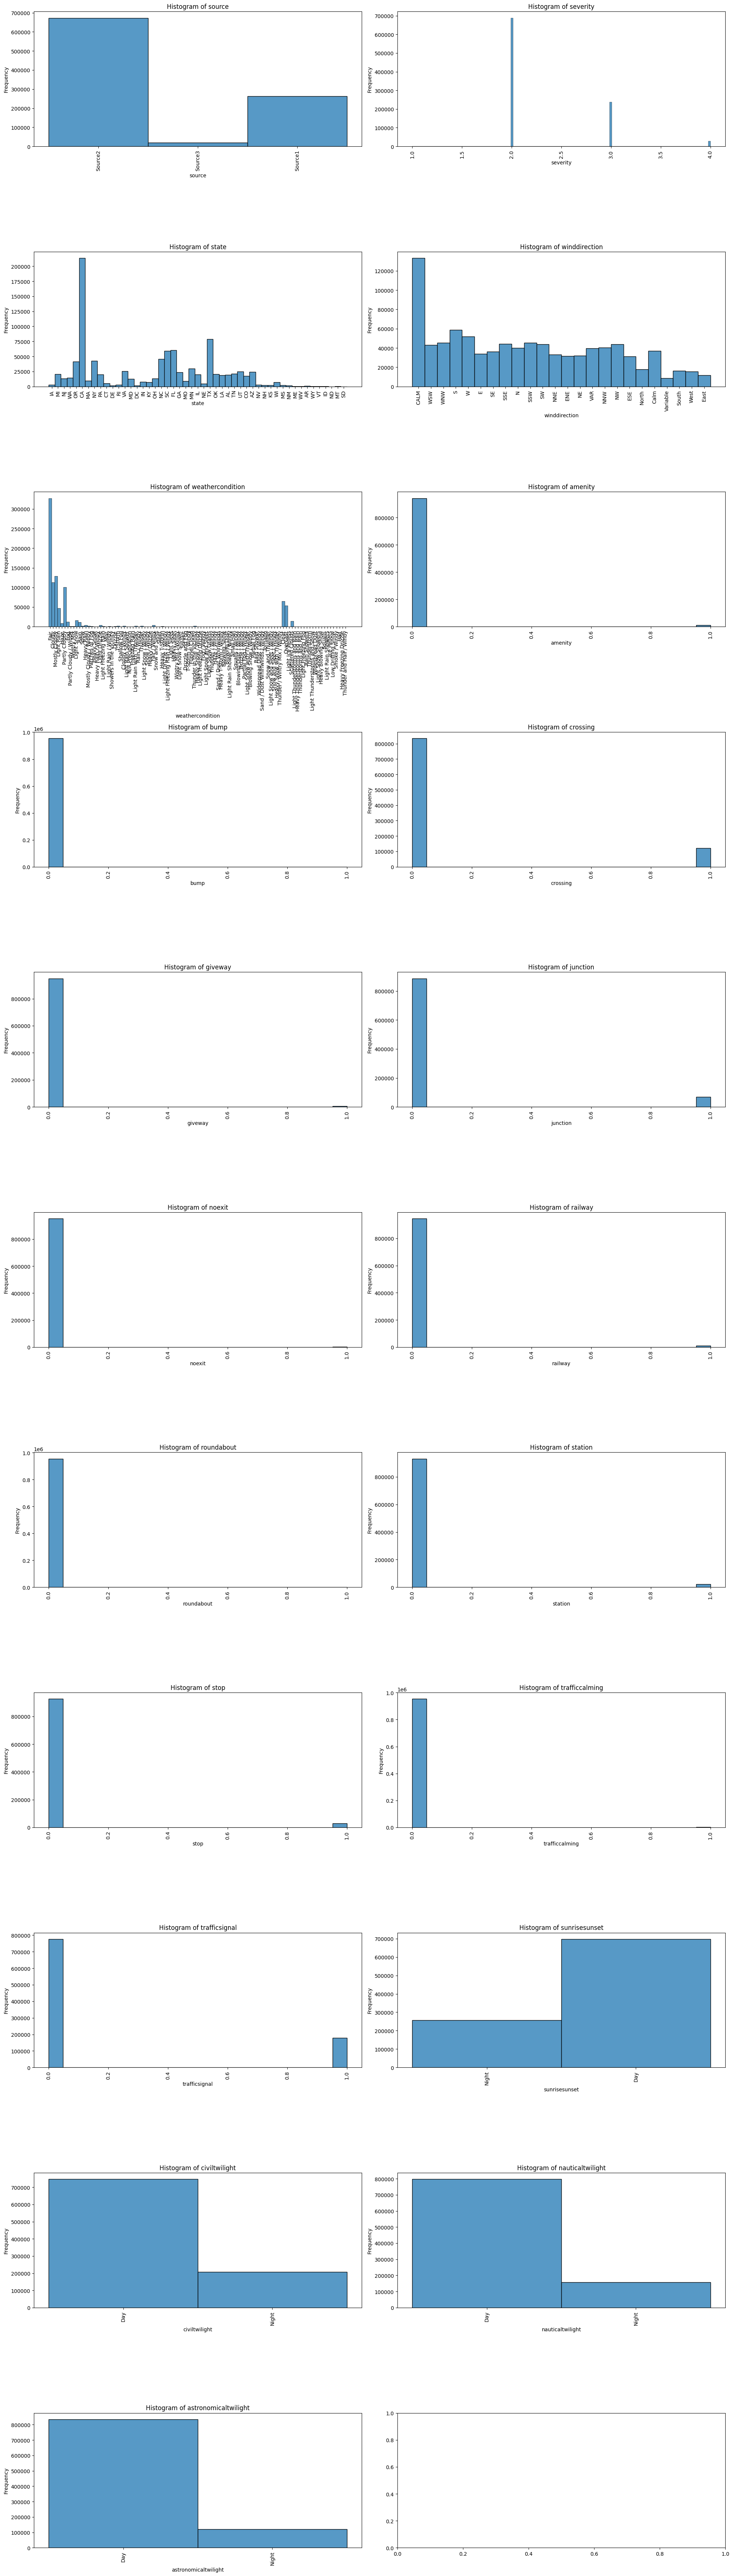

In [29]:
# Gather all columns in variable
cate_uni = [
       'source', 'severity', 'state', 'winddirection','weathercondition', 'amenity',
       'bump', 'crossing', 'giveway', 'junction', 'noexit', 'railway',
       'roundabout', 'station', 'stop', 'trafficcalming', 'trafficsignal',
       'sunrisesunset', 'civiltwilight', 'nauticaltwilight', 'astronomicaltwilight'
]

# Create Figure
fig, axs = plt.subplots(nrows=11, ncols=2, figsize=(20, 70))
for i in range(len(cate_uni)):
    sns.histplot(df[cate_uni[i]], edgecolor='black', ax=axs[i//2][i%2])
    axs[i//2][i%2].set_title(f'Histogram of {cate_uni[i]}')
    axs[i//2][i%2].set_xlabel(cate_uni[i])
    axs[i//2][i%2].set_ylabel('Frequency')
    axs[i//2][i%2].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()


#### Accidents Analysis by State


In [30]:
# Get the count of accidents by state
accidents_by_state = df['state'].value_counts().reset_index()
accidents_by_state.columns = ['State_Code', 'Accident_Count']
# Create a dictionary with state codes and their populations
state_population = {
    'CA': 39538223, 'TX': 29145505, 'FL': 21538187, 'NY': 20201249, 'PA': 13002700, 'IL': 12812508, 'OH': 11799448,
    'GA': 10711908, 'NC': 10439388, 'MI': 10077331, 'NJ': 9288994, 'VA': 8631393, 'WA': 7705281, 'AZ': 7151502,
    'MA': 7029917, 'TN': 6910840, 'IN': 6785528, 'MD': 6177224, 'MO': 6154913, 'WI': 5893718, 'CO': 5773714,
    'MN': 5706494, 'SC': 5118425, 'AL': 5024279, 'LA': 4657757, 'KY': 4505836, 'OR': 4237256, 'OK': 3959353,
    'CT': 3605944, 'UT': 3271616, 'IA': 3190369, 'NV': 3104614, 'AR': 3011524, 'MS': 2961279, 'KS': 2937880,
    'NM': 2117522, 'NE': 1961504, 'ID': 1839106, 'WV': 1793716, 'HI': 1455271, 'NH': 1377529, 'ME': 1362359,
    'RI': 1097379, 'MT': 1084225, 'DE': 989948, 'SD': 886667, 'ND': 779094, 'AK': 733391, 'DC': 689545,
    'VT': 643077, 'WY': 576851
}
# Create a DataFrame with state populations
population_data = pd.DataFrame(list(state_population.items()), columns=['State_Code', 'Population'])

# Merge accident data and population data
merged_data = accidents_by_state.merge(population_data, on='State_Code')

# Calculate accidents per population
merged_data['Accidents_per_Population'] = merged_data['Accident_Count'] / merged_data['Population']

# Sort by accidents per population in descending order
merged_data = merged_data.sort_values(by='Accidents_per_Population', ascending=False)

# Show the top 5 states with the highest accidents per population
top_5_states = merged_data[['State_Code', 'Accidents_per_Population']].head(3)

# Rename columns for cleaner data
top_5_states.columns = ['State Code', 'Accidents per Population']

# Reset the index for a cleaner presentation
top_5_states.reset_index(drop=True, inplace=True)

# Display the result
print(top_5_states)

  State Code  Accidents per Population
0         SC                  0.011526
1         OR                  0.009723
2         UT                  0.007568


##### Analysing our Categorical Data we can conclude:

- Source: More than half of the information comes from Source 1 when compared between the 3 sources we have. 

- Severity: Most of the accidents have a level 2 and 3 of severity in the traffic impact. Only a small number has the highest level of 4. 

- State: We can observe that California, Texas and Florida are the states where more accidents occur in the USA. Also to note that these 3 states are the top 3 most populated states in the Country. A curious observation is that New York, despite being the 4th most populated state, has much lower number of accidents when compared to the the top 3. We know that in NY people use more transportation and have less own vehicles when compared to CA, TX, and Florida. Looking at Accidents per Popualation, this data completely changes, South Carolina, Oregon and Utah are the states where more accidents happen per population.

- Wind Direction: Looking at the data, we see that first thing that pops out is that the original data is a bit chaotic and needs clean up. None the less, majority of accidents happen when it's 'Calm', and the other directons are pretty much even on their distribution, which means that wind doesn't look like a category that impacts accident severity. 

-  Weather Conditions: Again the original data is totally chaotic and needs a deep cleaning. Ideally by aggregating the conditions in various families of conditions. Again we see that most accidents happen when the conditions are Fair, which might mean that the Weather conditions themselves are also not impact the accident severity. 

- Amenity: Majority of accidents happen where there are no amenities around.

- Bump: Majority of accidents happen where there are no bumps around. 

- Crossing: Majority of accidents happen where there are no crossing in a nearby location

- Giveaway: Majority of accidents happen where there are no giveaways around.

- Junction: Majority of accidents happen where there are no junctions around.

- No Exit: Majority of accidents happen where there are no 'No Exit' signs around.

- Railway: Majority of accidents happen where there are no railways around.

- Roundabout: Majority of accidents happen where there are no roundabouts around.

- Station: Majority of accidents happen where there are no stations (bus, metro, etc..) around.

- Stop: Majority of accidents happen where there are no stop signs around.

- Traffic Calming: Majority of accidents happen where there are no Traffic Calming in nearby locations.

- Traffic Signal: Majority of accidents happen where there are no Traffic Signal in nearby locations.

- Sunrise Sunset: We can observe that more than double of the accidents happen during the Day period.

- Civil Twilight: We can observe that majority accidents happen during the Day by the Civil Twilight Measure. 

- Nautical Twilight: We can observe that majority accidents happen during the Day by the Nautical Twilight Measure. 

- Astronomical Twilight: We can observe that majority accidents happen during the Day by the Astronomical  Twilight Measure. 

The 4 Twilight measures, despite measuring in different ways, they all point the same observation, that the majority of accidents that impact traffic severity occur during the day.

#### Street Analysis

In [31]:
import re
from collections import Counter

# create a list of top 40 most common words in street name
st_type =' '.join(df['street'].unique().tolist()) # flat the array of street name
st_type = re.split(' |-', st_type) # split the long string by space and hyphen
st_type = [x[0] for x in Counter(st_type).most_common(40)] # select the 40 most common words
print('the 40 most common words')
print(*st_type, sep = ', ') 

the 40 most common words
Rd, , St, Ave, Dr, N, S, E, W, Blvd, Highway, Ln, Hwy, State, Pkwy, Way, NE, NW, SW, SE, Road, US, Ct, Old, Pl, Route, Creek, County, Cir, Park, Hill, Lake, I, Valley, Trl, Ridge, Pike, Mill, River, Fwy


In [32]:
# Remove some irrelevant words and add spaces and hyphen back
st_type= [' Rd', ' St', ' Dr', ' Ave', ' Blvd', ' Ln', ' Highway', ' Pkwy', ' Hwy', 
          ' Way', ' Ct', 'Pl', ' Road', 'US-', 'Creek', ' Cir',  'Route', 
          'I-', 'Trl', 'Pike', ' Fwy']
print(*st_type, sep = ', ')  

 Rd,  St,  Dr,  Ave,  Blvd,  Ln,  Highway,  Pkwy,  Hwy,  Way,  Ct, Pl,  Road, US-, Creek,  Cir, Route, I-, Trl, Pike,  Fwy


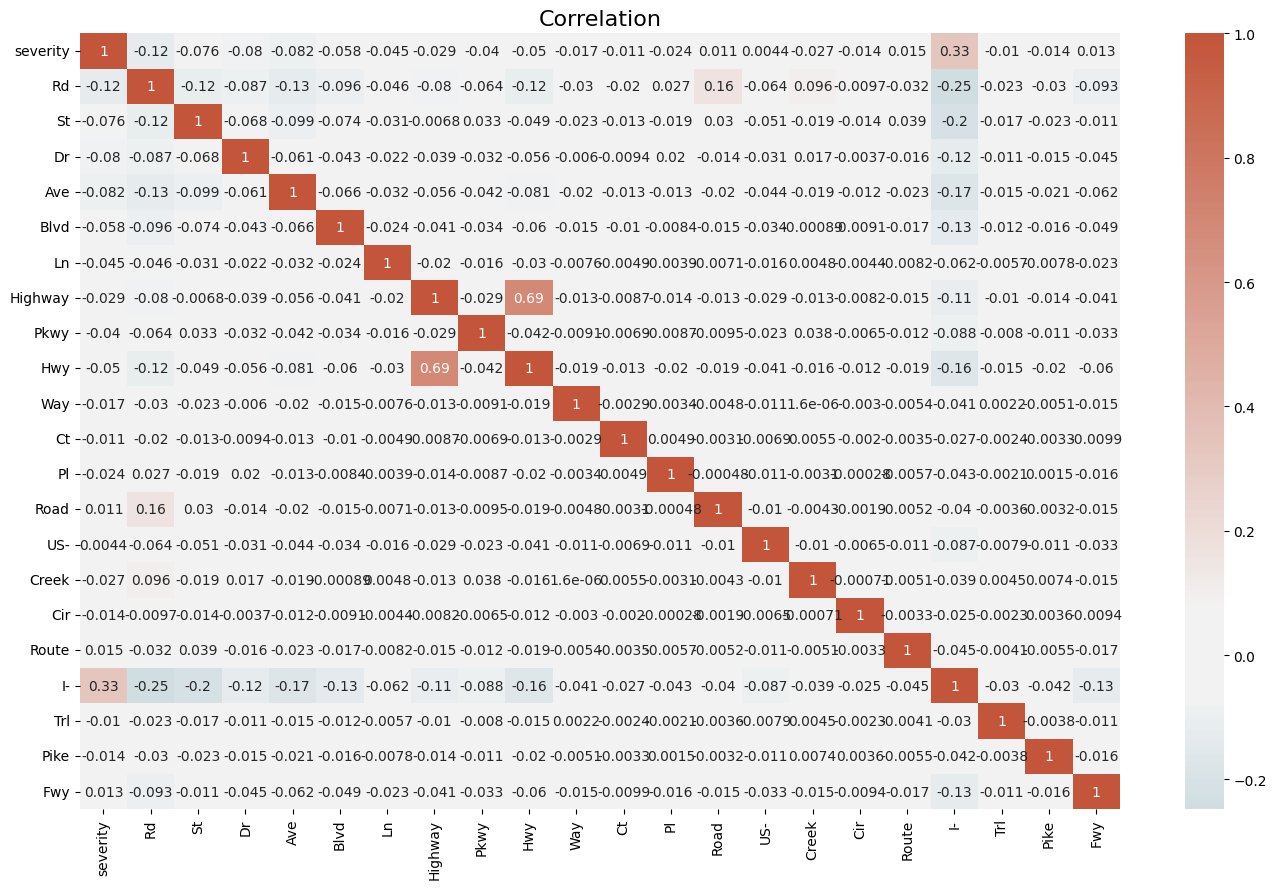

In [33]:
import numpy as np

# for each word create a boolean column
for i in st_type:
  df[i.strip()] = np.where(df['street'].str.contains(i, case=True, na = False), True, False)
df.loc[df['Road']==1,'Rd'] = True
df.loc[df['Highway']==1,'Hwy'] = True

# plot correlation
df['severity'] = df['severity'].astype(int)
street_corr  = df.loc[:,['severity']+[x.strip() for x in st_type]].corr()
plt.figure(figsize=(14,9))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(street_corr, annot=True, cmap=cmap, center=0).set_title('Correlation', fontsize=16)
plt.tight_layout()
plt.show()

In [34]:
drop_list = street_corr.index[street_corr['severity'].abs()<0.05].to_list()
df = df.drop(drop_list, axis=1)
df = df.drop(['street'], axis=1)

As it can be observed on the Univariate Categorical Analysis, we left street out, due to the fact that the information inside it has a lot of unique values. 
So our approach was to try and identify as much as possible unique repeated values, and simplificate them for a deeper analysis going forward. 

We deemed valued to analysis the type of roads where accidents happen, instead of analysis Street as a whole, due to the fact that the data inside it is somewhat chaotic. 

### Univariate Numeric Analysis

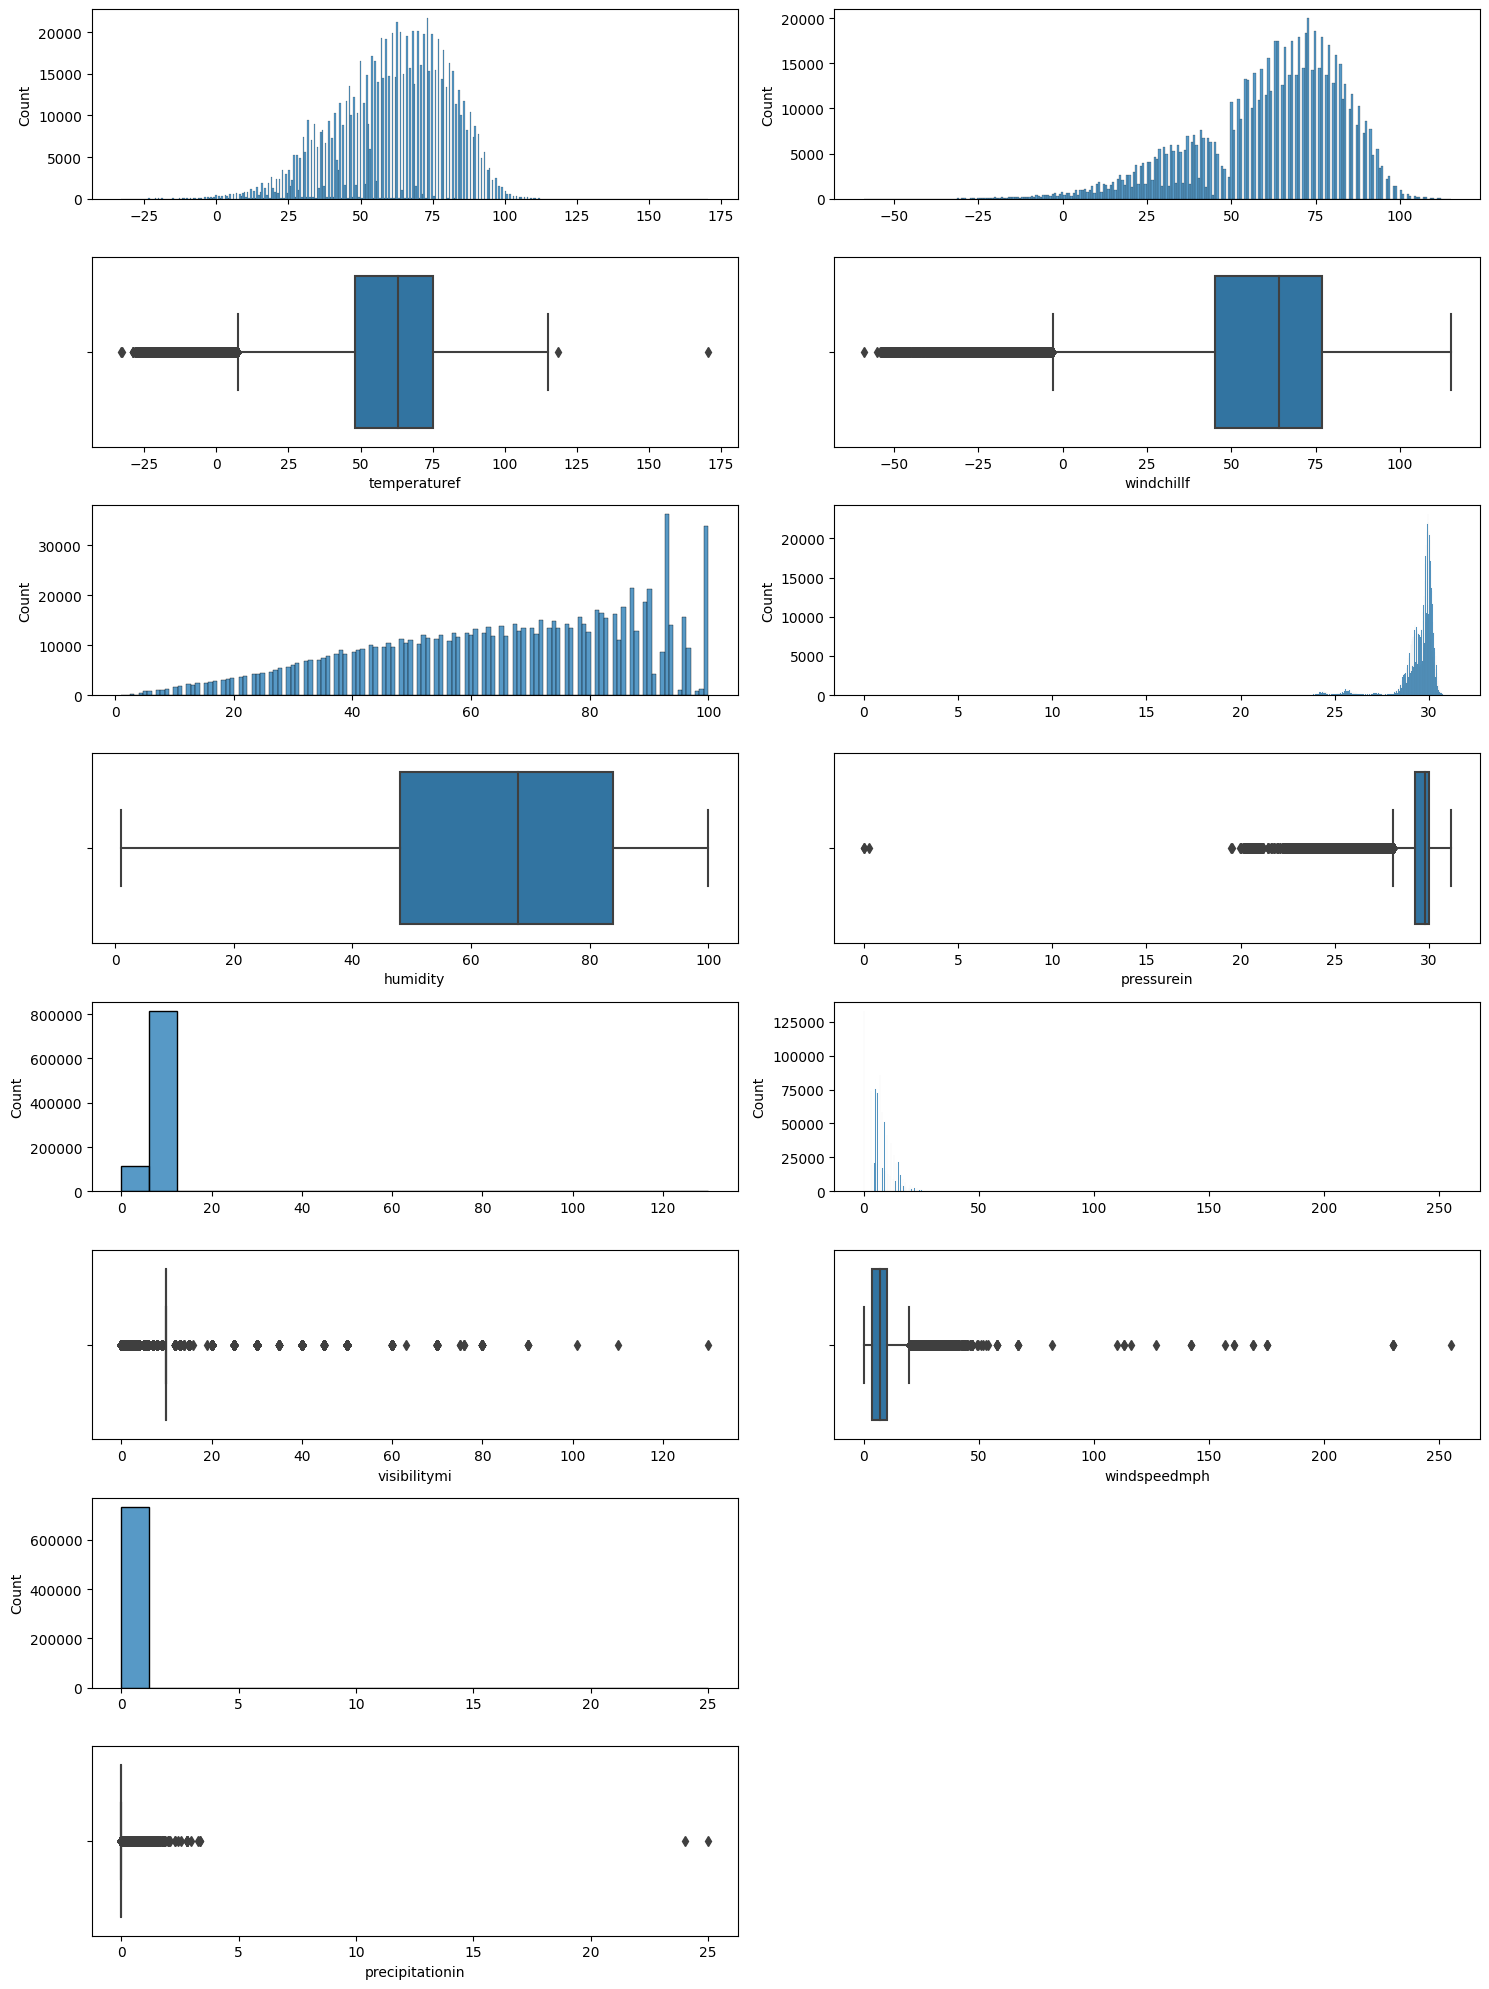

In [35]:
# Numerical-Numerical Analysis of the Dataset

# Define the numerical columns
numerical_columns = [
       'temperaturef', 'windchillf',
       'humidity', 'pressurein', 'visibilitymi','windspeedmph', 
       'precipitationin'
]

# Create Figure
fig, axis = plt.subplots(8, 2, figsize=(15, 20))

# Plot the Data
# Iterate through each column and plot histograms and box plots
for i, col_name in enumerate(numerical_columns):
    if i % 2 == 0 :
        sns.histplot(ax=axis[i, 0], data=df, x=col_name).set(xlabel=None)
        sns.boxplot(ax=axis[i + 1, 0 ], data=df, x=col_name)
    else :
        sns.histplot(ax=axis[i - 1, 1], data=df, x=col_name).set(xlabel=None)
        sns.boxplot(ax=axis[i , 1 ], data=df, x=col_name)
fig.delaxes(axis[6,1])
fig.delaxes(axis[7,1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

#### Analysis Conclusion

Looking at the graphics, we can conclude that all the distributions are normal distributions, because they represent value measures like Farenheit, PSI, inches. 

There's a lot of outliers in the data, mainly in pressure and windspeedmph, which can perhaps represent extreme climate conditions or possibly errors. But we are not going to delete them because the majority of the data is between real values of the real world. 


### Clean up Categorical Features

##### Wind Direction

Wind Direction has a lot of repeated values and a non-uniformed df structure. It's chaos, so we are going to proceed to simplify

In [36]:
# Identify all the Wind Direction Data

print('Wind Direction: ', df['winddirection'].unique())

Wind Direction:  ['CALM' 'WSW' 'WNW' 'S' 'W' 'E' 'SE' 'SSE' 'N' 'SSW' None 'SW' 'NNE' 'ENE'
 'NE' 'VAR' 'NNW' 'NW' 'ESE' 'North' 'Calm' 'Variable' 'South' 'West'
 'East']


In [37]:
# Group and Simplify the various attributes

df.loc[df['winddirection']=='Calm','winddirection'] = 'CALM'
df.loc[(df['winddirection']=='West')|(df['winddirection']=='WSW')|(df['winddirection']=='WNW'),'winddirection'] = 'W'
df.loc[(df['winddirection']=='South')|(df['winddirection']=='SSW')|(df['winddirection']=='SSE'),'winddirection'] = 'S'
df.loc[(df['winddirection']=='North')|(df['winddirection']=='NNW')|(df['winddirection']=='NNE'),'winddirection'] = 'N'
df.loc[(df['winddirection']=='East')|(df['winddirection']=='ESE')|(df['winddirection']=='ENE'),'winddirection'] = 'E'
df.loc[df['winddirection']=='Variable','winddirection'] = 'VAR'
print('Wind Direction after simplification: ', df['winddirection'].unique())

Wind Direction after simplification:  ['CALM' 'W' 'S' 'E' 'SE' 'N' None 'SW' 'NE' 'VAR' 'NW']


#### Weather Conditions 

Looking at the Weather Conditions, there is a lot of attributes, which make it chaos to understand and have good df to model. So the idea here is to group the various conditions into a 'general' condition like 'Rain', 'Heavy Snow' and One-Hot Encode (True / False) if the condition is met or not. 

In [38]:
# Drop NaN from Weather Conditions

df = df.dropna(subset=['weathercondition'])

In [39]:
# Identify all unique attributes of Weather Condition
print('Unique Values of Weather:' , df['weathercondition'].unique() )

Valores únicos de Weather Condition: ['Fair' 'Cloudy' 'Mostly Cloudy' 'Light Rain' 'Haze' 'Partly Cloudy' 'Fog'
 'Partly Cloudy / Windy' 'Wintry Mix' 'Light Snow' 'Rain' 'Snow'
 'Heavy Rain' 'Mostly Cloudy / Windy' 'Patches of Fog' 'Heavy Snow'
 'Heavy Rain / Windy' 'Light Drizzle' 'Light Freezing Rain' 'Mist'
 'Light Rain / Windy' 'Showers in the Vicinity' 'Drizzle' 'T-Storm'
 'Shallow Fog' 'Cloudy / Windy' 'Light Rain Shower' 'N/A Precipitation'
 'Freezing Rain' 'Light Rain with Thunder' 'Rain / Windy' 'Thunder'
 'Light Snow / Windy' 'Snow / Windy' 'Heavy Drizzle' 'Fair / Windy'
 'Snow and Sleet' 'Sleet' 'Heavy T-Storm' 'Light Drizzle / Windy'
 'Light Freezing Rain / Windy' 'Light Sleet' 'Heavy Sleet'
 'Wintry Mix / Windy' 'Light Snow Shower' 'Smoke' 'Drizzle and Fog'
 'T-Storm / Windy' 'Funnel Cloud' 'Thunder in the Vicinity'
 'Heavy Snow / Windy' 'Light Freezing Drizzle' 'Fog / Windy'
 'Light Snow and Sleet' 'Light Snow Grains' 'Thunder / Windy'
 'Haze / Windy' 'Sand / Dust Whirlwi

In [40]:
# One-Hot Encoding for The Weather
import numpy as np 

df['clear'] = np.where(df['weathercondition'].str.contains('Clear|Fair', case=False, na = False), True, False)
df['cloud'] = np.where(df['weathercondition'].str.contains('Cloud|Overcast|Cloudy', case=False, na = False), True, False)
df['rain'] = np.where(df['weathercondition'].str.contains('Rain|storm', case=False, na = False), True, False)
df['heavyrain'] = np.where(df['weathercondition'].str.contains('Heavy Rain|Rain Shower|Heavy T-Storm|Heavy Thunderstorms', case=False, na = False), True, False)
df['snow'] = np.where(df['weathercondition'].str.contains('Snow|Sleet|Ice|Wintry|Hail', case=False, na = False), True, False)
df['heavysnow'] = np.where(df['weathercondition'].str.contains('Heavy Snow|Heavy Sleet|Heavy Ice Pellets|Snow Showers|Squalls', case=False, na = False), True, False)
df['fog'] = np.where(df['weathercondition'].str.contains('Fog|Haze|Mist|Smoke|Sand|Dust', case=False, na = False), True, False)

df = df.drop(['weathercondition'], axis=1)

With this code, we created groups of weather conditions to be able to predict better and understand how much weather can affect the severity of an accident. As studied, weather can affect the severity of an accident, for example Snow and Rain can provoke worse accidents than a clear day. This is known by experience. In the end we delete the original Feature as it's of no use for our predictive model. 

#### Clean DateTime Format 

In [41]:
# Compare Start Time and Weather Time Stamp to check if there are differences

#Connvert Weather Timestamp to Date Type
df['weathertimestamp'] = pd.to_datetime(df['weathertimestamp'], errors='coerce')

print((df.weathertimestamp - df.starttime).mean())

# Delete Weather Timestamp 
df = df.drop(['weathertimestamp'], axis=1)

0 days 00:00:52.114289865


We can observe the the time difference is very small, making it practically the same. We can delete Weather Timestampe feature.

In [42]:
# Extract Minutes (in a day) Information from our Start Time feature

df['minute']=df['hour']*60.0+df['starttime'].dt.minute

df.loc[:4, ['starttime', 'year', 'month', 'day', 'hour', 'weekday', 'minute']]

,starttime,year,month,day,hour,weekday,minute
0,2019-12-26 17:09:52,2019,Dec,26,17,Thu,1029.0
1,2019-12-26 17:10:32,2019,Dec,26,17,Thu,1030.0
2,2019-12-31 23:49:36,2019,Dec,31,23,Tue,1429.0
3,2019-12-31 23:50:02,2019,Dec,31,23,Tue,1430.0
4,2019-12-31 23:29:03,2019,Dec,31,23,Tue,1409.0


Since our data estimates the severity of an accident on traffic, we deemed important to also get the minutes from our data. 

### Analysing Accidents per DateTime

#### Analysing Weekdays Accident Data

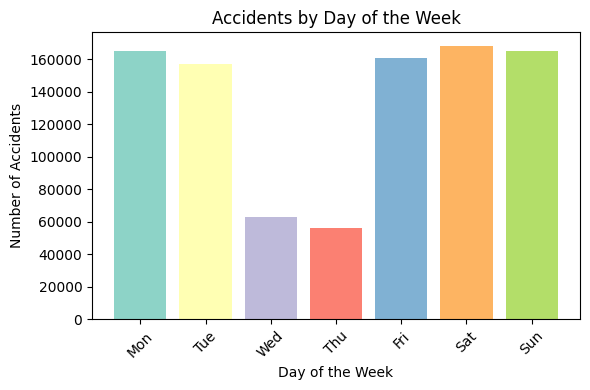

In [43]:
# Analysing Accidents per Weekdays

# Count the number of accidents per day of the week
day_counts = df['weekday'].value_counts().sort_index()

# Define the names of the days of the week for labeling
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Create a bar plot
plt.figure(figsize=(6, 4))
colors = sns.color_palette('Set3')
plt.bar(day_names, day_counts, color =colors)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Day of the Week')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the plot
plt.show()

Looking at the data, we see that Wednesday and Thursday are days with way less accidents comparinng against the others. The others days have quite similar numbers. 
 

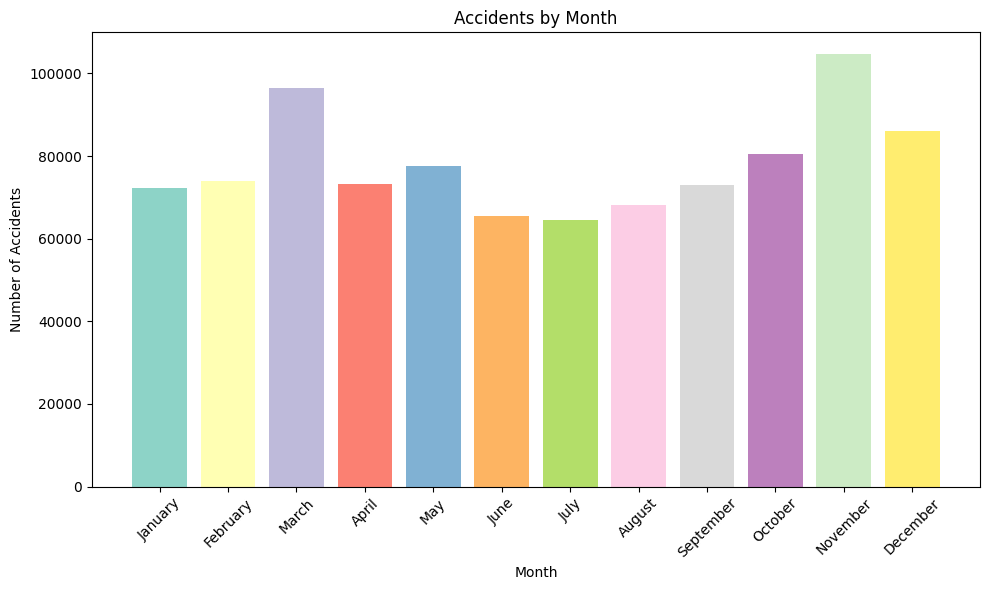

In [44]:
# Analysing Accidents per Month

# Count the number of accidents per month
month_counts = df['month'].value_counts().sort_index()

# Define the names of the months for labeling
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Use Seaborn's color palette 'Set3' for the bars
colors = sns.color_palette('Set3')

# Create a bar plot with the specified colors
plt.figure(figsize=(10, 6))
plt.bar(month_names, month_counts, color=colors)
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Month')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the plot
plt.show()

This data is interesting, winter months, like November and December have a high rate of accidents, which can perhaps be affectd by the Weather. March is also one of the months with highest accidents, which in a way could also be due to weather, as it's normally a more rainy time in some regions. We need to look further down if this is the case.

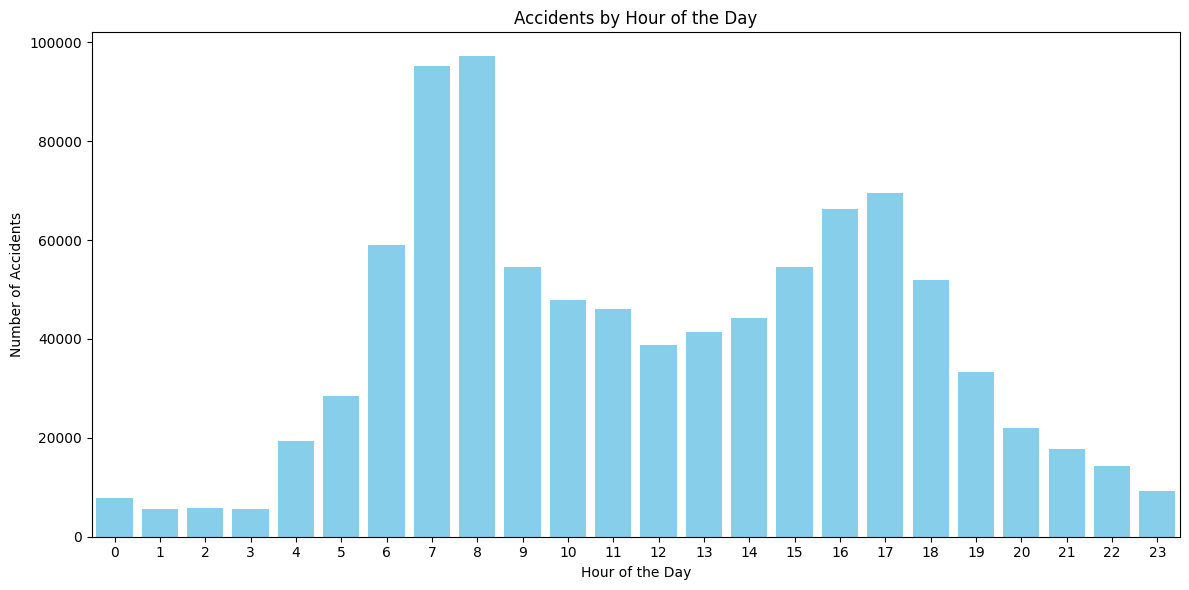

In [45]:
# Analysing Accidents per Hours

# Count the number of accidents per hour
hour_counts = df['hour'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(hour_counts.index, hour_counts, color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Hour of the Day')
plt.xticks(range(24))  # Set x-ticks to show all hours (0-23)
plt.xlim(-0.5, 23.5)  # Set the x-axis limits
plt.tight_layout()

# Show the plot
plt.show()

Accidents per Hours allows us to understand the flow of traffic. 7 and 8 am are the highest ones, because it's the time when people leave homes to go to work, which normally has higher influx of traffic around the roads. At the same, 4 and 5 pm have a similar effect, as it's the time that the majority of people leave their jobs to go back home. 

### Plotting the Accidents per Location 

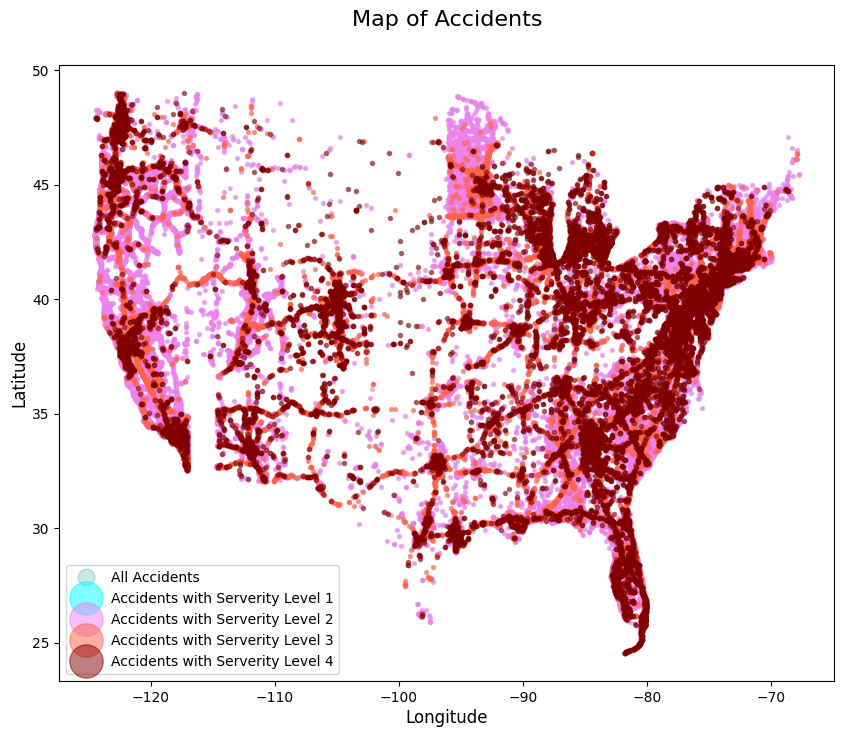

In [46]:
# Create Dataset for each Severity Level
dfsev1 = df[df['severity'] == 1]
dfsev2 = df[df['severity'] == 2]
dfsev3 = df[df['severity'] == 3]
dfsev4 = df[df['severity'] == 4]

# Plot figure
plt.figure(figsize=(10,8))

# Define the plots from all accidents and the Severity Levels
plt.plot( 'startlng', 'startlat', data=df, linestyle='', marker='o', markersize=1.5, color='teal', alpha=0.2, label='All Accidents')
plt.plot( 'startlng', 'startlat', data=dfsev1, linestyle='', marker='o', markersize=3, color='aqua', alpha=0.5, label='Accidents with Serverity Level 1')
plt.plot( 'startlng', 'startlat', data=dfsev2, linestyle='', marker='o', markersize=3, color='violet', alpha=0.5, label='Accidents with Serverity Level 2')
plt.plot( 'startlng', 'startlat', data=dfsev3, linestyle='', marker='o', markersize=3, color='tomato', alpha=0.5, label='Accidents with Serverity Level 3')
plt.plot( 'startlng', 'startlat', data=dfsev4, linestyle='', marker='o', markersize=3, color='maroon', alpha=0.5, label='Accidents with Serverity Level 4')
plt.legend(markerscale=8)
plt.xlabel('Longitude', size=12, labelpad=3)
plt.ylabel('Latitude', size=12, labelpad=3)
plt.title('Map of Accidents', size=16, y=1.05)
plt.show()

Plotting the accidents by Coordinates does validate that indeed our data is in the US, and most of all also confirms that the places with more accidents are indeed correct. 

## Multivariate Analysis

### Multivariate Categorical-Categorical Data Analysis


In [47]:
# Check Again the variables

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 936076 entries, 0 to 954301
Data columns (total 55 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   source                936076 non-null  object        
 1   severity              936076 non-null  int64         
 2   starttime             936076 non-null  datetime64[ns]
 3   startlat              936076 non-null  float64       
 4   startlng              936076 non-null  float64       
 5   city                  936058 non-null  object        
 6   county                936076 non-null  object        
 7   state                 936076 non-null  object        
 8   zipcode               936076 non-null  object        
 9   timezone              936076 non-null  object        
 10  airportcode           936076 non-null  object        
 11  temperaturef          932672 non-null  float64       
 12  windchillf            803253 non-null  float64       
 13  humi

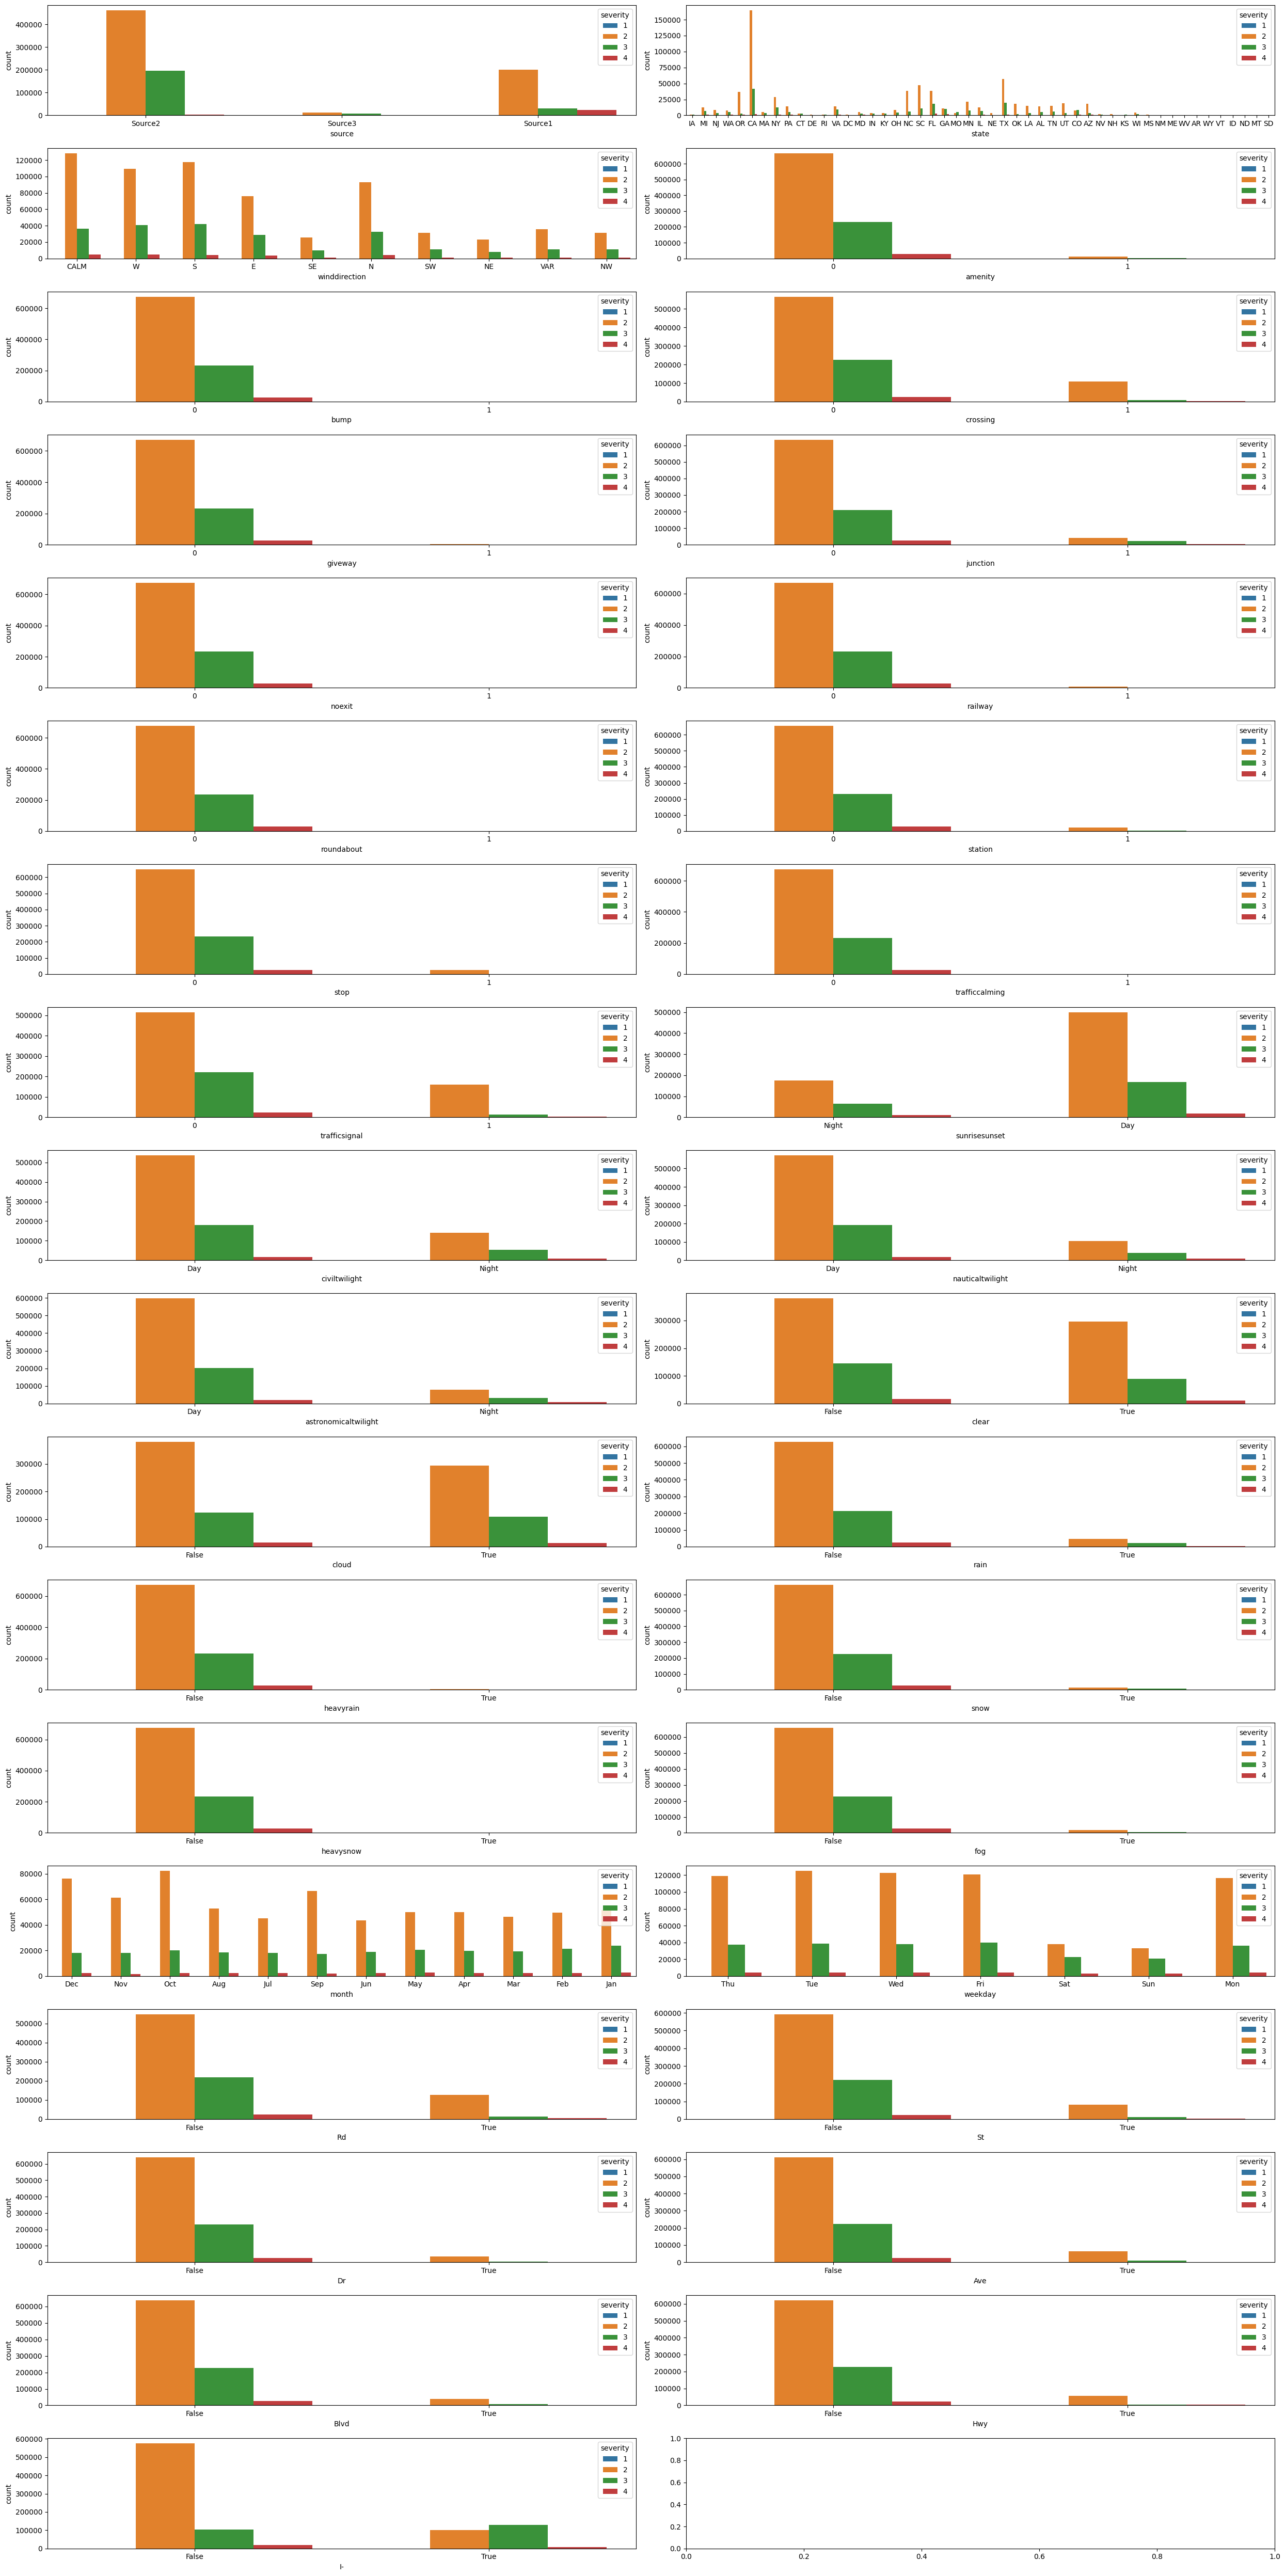

In [48]:
# Categorical - Categorical Analysis - The Class and Several Predictors

# Draw a Canvas
fig, axis = plt.subplots(18, 2, figsize=(25, 50))

# Define the categorical columns
categorical_columns = [
       'source', 'state', 'winddirection', 'amenity',
       'bump', 'crossing', 'giveway', 'junction', 'noexit', 'railway',
       'roundabout', 'station', 'stop', 'trafficcalming', 'trafficsignal',
       'sunrisesunset', 'civiltwilight', 'nauticaltwilight', 'astronomicaltwilight', 
       'clear', 'cloud', 'rain', 'heavyrain', 'snow', 'heavysnow', 'fog', 'month',
       'weekday', 'Rd', 'St', 'Dr', 'Ave', 'Blvd', 'Hwy', 'I-'
]

# Plot the Data
for i, column in enumerate(categorical_columns):
    sns.countplot(ax=axis[i//2,i%2], data=df, x=column, hue='severity')

# Adjust the layout
plt.tight_layout()

# Plot the Layout
plt.show()

### Categorical - Categorical Analysis

- Source - We can see by the distribution of the data, the the 3 sources don't have the same kind of reports between all of them. We see that Source 2 almost has no Level 4 Severity and we see that Source 1 has more cases in all Levels. We can conclude that is very hard to do a match between all the sources to get an homogeneous Level report. 

- State - In Categorical - Categorical State matches we confirm that the same states continue to have the same amount of accident report. But we can see that the Top 3 states don't mean that they have the higher number of Level 4 Severity. In this case GA, FL have the most Level 4 Severity. Which means that there's correlation on the amount of Severity of Accidents vs the number of accidents on state. 

- winddirection - We can observe that the majority of accidents happen when Wind Direction is 'Calm'. And by looking at the distribution of the data, we can see that Wind Direction has no impact on the Severity of the Accidents. 

- amenity - we can watch that the majority of accidents happen far from locations with amenities. Plus the ones that do nearby amenities in majority level 2 accidents. 

- bump - we can observe that bumps have no correlation to the severity of accidents. The majority happen where there was no bumps.

- crossing - Majority of accidents happen in locations without crossings. Still there's an interesting number of accidents of level 2 that do happen with crossings nearby. 

- giveway - we can observe that giveways have no correlation to the severity of accidents. The majority happen where there was no giveways.

- junction - Majority of accidents happen in locations without junctions. Still there's an interesting number of accidents of level 2 that do happen with junctions nearby. 

- noexit - we can observe that noexit have no correlation to the severity of accidents. The majority happen where there was no noexit.

- railway - Majority of accidents happen in locations where there are no railway. Still there's an interesting number of accidents of level 2 that do happen with railways nearby.

- roundabout - we can observe that roundabouts have no correlation to the severity of accidents. The majority happen where there was no roundabouts. This shows that Roundabouts are indeed a safeity traffic measure that is effective.

- station - Majority of accidents happen in locations where there are no stations. Still there's an interesting number of accidents of level 2 that do happen with station nearby.

- stop - Majority of accidents happen in locations where there are no stop. Still there's an interesting number of accidents of level 2 that do happen with stop nearby.

- trafficcalming - we can observe that trafficcalming have no correlation to the severity of accidents. The majority happen where there was no trafficcalming. This shows that Traffic Calming are indeed a safeity traffic measure that is effective.

- trafficsignal  Majority of accidents happen in locations without trafficsignal. Still there's an interesting number of accidents of level 2 that do happen with trafficsignal nearby, which shows the Traffic Signs are not very effective of stopping accidents. 

- sunrisesunset, civiltwiglight, nauticaltwilight, astronomicaltwilight - It shows that majority of the accidents happen during the day. 

- clear - We can observe that accidents do happen more when the weather condition is not clear, but the difference is not that big. The numbers are almost the same. 

- cloud - We see that accidents happen more when there's no cloudy weather condition. Still there's only a little gap between the numbers of accidents that do occur when the weather is cloudy. 

- rain - We see that accidents happen more when there's no rainy weather condition. Still there are some accidents that do happen because of rainy weather. 

- heavyrain - We observe that heavyrain has no impact on the severity of accidents. There's almost no accidents in these conditions. 

- snow - We see that accidents happen more when there's no snowy weather condition. Still there are some accidents that do happen because of snowy weather. 

- heavysnowy - We observe that heavysnowy has no impact on the severity of accidents. There's almost no accidents in these conditions. 

- fog - We see that accidents happen more when there's no foggy weather condition. Still there are some accidents that do happen because of foggy weather. 

- month, weekday - We can conclude that accidents happen all the time in a quite cosntant manner. There's no relation that tells us that because there's more accidents, the level of severity will also increase in number. We observe that level 4 severity is very constant as well as level 3. 

### Multivariate Numerical-Numerical Analysis


In [49]:
# # Numerical-Numerical Analysis of the Dataset

# # Draw a canvas
# fig, axis = plt.subplots(8, 2, figsize=(15, 20))

# # Define the numerical columns
# numerical_columns = [
#        'temperaturef', 'windchillf',
#        'humidity', 'pressurein', 'visibilitymi','windspeedmph', 'precipitationin'
# ]

# # Plot the Data
# for i, column in enumerate(numerical_columns):
#     if i % 2 == 0:
#         sns.regplot(ax=axis[i,0], data=df, x=column, y='severity')
#         sns.heatmap(df[['severity', column]].corr(), annot=True, fmt='.2f', ax=axis[i+1,0], cbar=False)
#     else:
#         sns.regplot(ax=axis[i-1 ,1], data=df, x=column, y='severity')
#         sns.heatmap(df[['severity', column]].corr(), annot=True, fmt='.2f', ax=axis[i,1], cbar=False)

# # Adjust Layout
# plt.tight_layout()

# # Plot the Data
# plt.show()

#### Multivariate Numerical Analysis

Looking into the data, none of these features have any relationship with Severity. Which means this data is useless and we can exclude it from our dataset, as it will not have any correlation to predict. 

#### Feature Engineering

##### NaN Values CleanUp

In [50]:
# Drop NaN Values

missing = pd.DataFrame(df.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / df.shape[0] * 100)
print(missing.loc[missing['Missing_Percent(%)']>0,:])


,Feature,Missing_Percent(%)
5,city,0.001923
11,temperaturef,0.363646
12,windchillf,14.189339
13,humidity,0.476457
14,pressurein,0.106295
15,visibilitymi,0.190903
16,winddirection,0.562027
17,windspeedmph,4.686478
18,precipitationin,21.930912
31,sunrisesunset,0.002350


In [51]:
# Drop NaN Values from all Dataset

df = df.dropna()

#### Drop Outliers

In [52]:
# Drop Outliers

df[df['precipitationin'] < 5]
df[df['windspeedmph'] < 120]
df[df['temperaturef'] < 125]

,source,severity,starttime,startlat,startlng,city,county,state,zipcode,timezone,...,Hwy,I-,clear,cloud,rain,heavyrain,snow,heavysnow,fog,minute
0,Source2,3,2019-12-26 17:09:52,40.884850,-95.800362,Thurman,Fremont,IA,51654,US/Central,...,False,True,True,False,False,False,False,False,False,1029.0
1,Source2,3,2019-12-26 17:10:32,40.889641,-95.798630,Thurman,Fremont,IA,51654,US/Central,...,False,True,True,False,False,False,False,False,False,1030.0
2,Source2,3,2019-12-31 23:49:36,42.313499,-83.091225,Detroit,Wayne,MI,48209,US/Eastern,...,False,False,False,True,False,False,False,False,False,1429.0
3,Source2,2,2019-12-31 23:50:02,42.398125,-83.109009,Detroit,Wayne,MI,48238,US/Eastern,...,False,False,False,True,False,False,False,False,False,1430.0
4,Source2,2,2019-12-31 23:29:03,39.754967,-75.276283,Swedesboro,Gloucester,NJ,08085,US/Eastern,...,False,False,False,True,False,False,False,False,False,1409.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954297,Source1,2,2019-08-23 18:03:25,34.002480,-117.379360,Riverside,Riverside,CA,92501,US/Pacific,...,False,False,True,False,False,False,False,False,False,1083.0
954298,Source1,2,2019-08-23 19:11:30,32.766960,-117.148060,San Diego,San Diego,CA,92108,US/Pacific,...,False,True,True,False,False,False,False,False,False,1151.0
954299,Source1,2,2019-08-23 19:00:21,33.775450,-117.847790,Orange,Orange,CA,92866,US/Pacific,...,False,False,False,True,False,False,False,False,False,1140.0
954300,Source1,2,2019-08-23 19:00:21,33.992460,-118.403020,Culver City,Los Angeles,CA,90230,US/Pacific,...,False,False,True,False,False,False,False,False,False,1140.0


Percipation values above 5 inches in a rainy day, it's already incredible high. So anything above that we decided to exclude because above that it's like a huge flood. 

Windspeedmph values above 100 miles are hurricanes level, so we decided to exclude anything above 120 miles per hour to give a bit of a margin

Temperaturef anything above 125 degrees is a bit extreme and not normal, so for the sake of data we only keep values below 125 F

### Categorical - Numerical Multivariate Analysis

In [53]:
# Factorize the Object Data

df['source_n'] = pd.factorize(df['source'])[0]
df['city_n'] = pd.factorize(df['city'])[0]
df['county_n'] = pd.factorize(df['county'])[0]
df['state_n'] = pd.factorize(df['state'])[0]
df['zipcode_n'] = pd.factorize(df['zipcode'])[0]
df['timezone_n'] = pd.factorize(df['timezone'])[0]
df['airportcode_n'] = pd.factorize(df['airportcode'])[0]
df['winddirection_n'] = pd.factorize(df['winddirection'])[0]
df['sunrisesunset_n'] = pd.factorize(df['sunrisesunset'])[0]
df['civiltwilight_n'] = pd.factorize(df['civiltwilight'])[0]
df['nauticaltwilight_n'] = pd.factorize(df['nauticaltwilight'])[0]
df['astronomicaltwilight_n'] = pd.factorize(df['astronomicaltwilight'])[0]
df['month_n'] = pd.factorize(df['month'])[0]
df['weekday_n'] = pd.factorize(df['weekday'])[0]

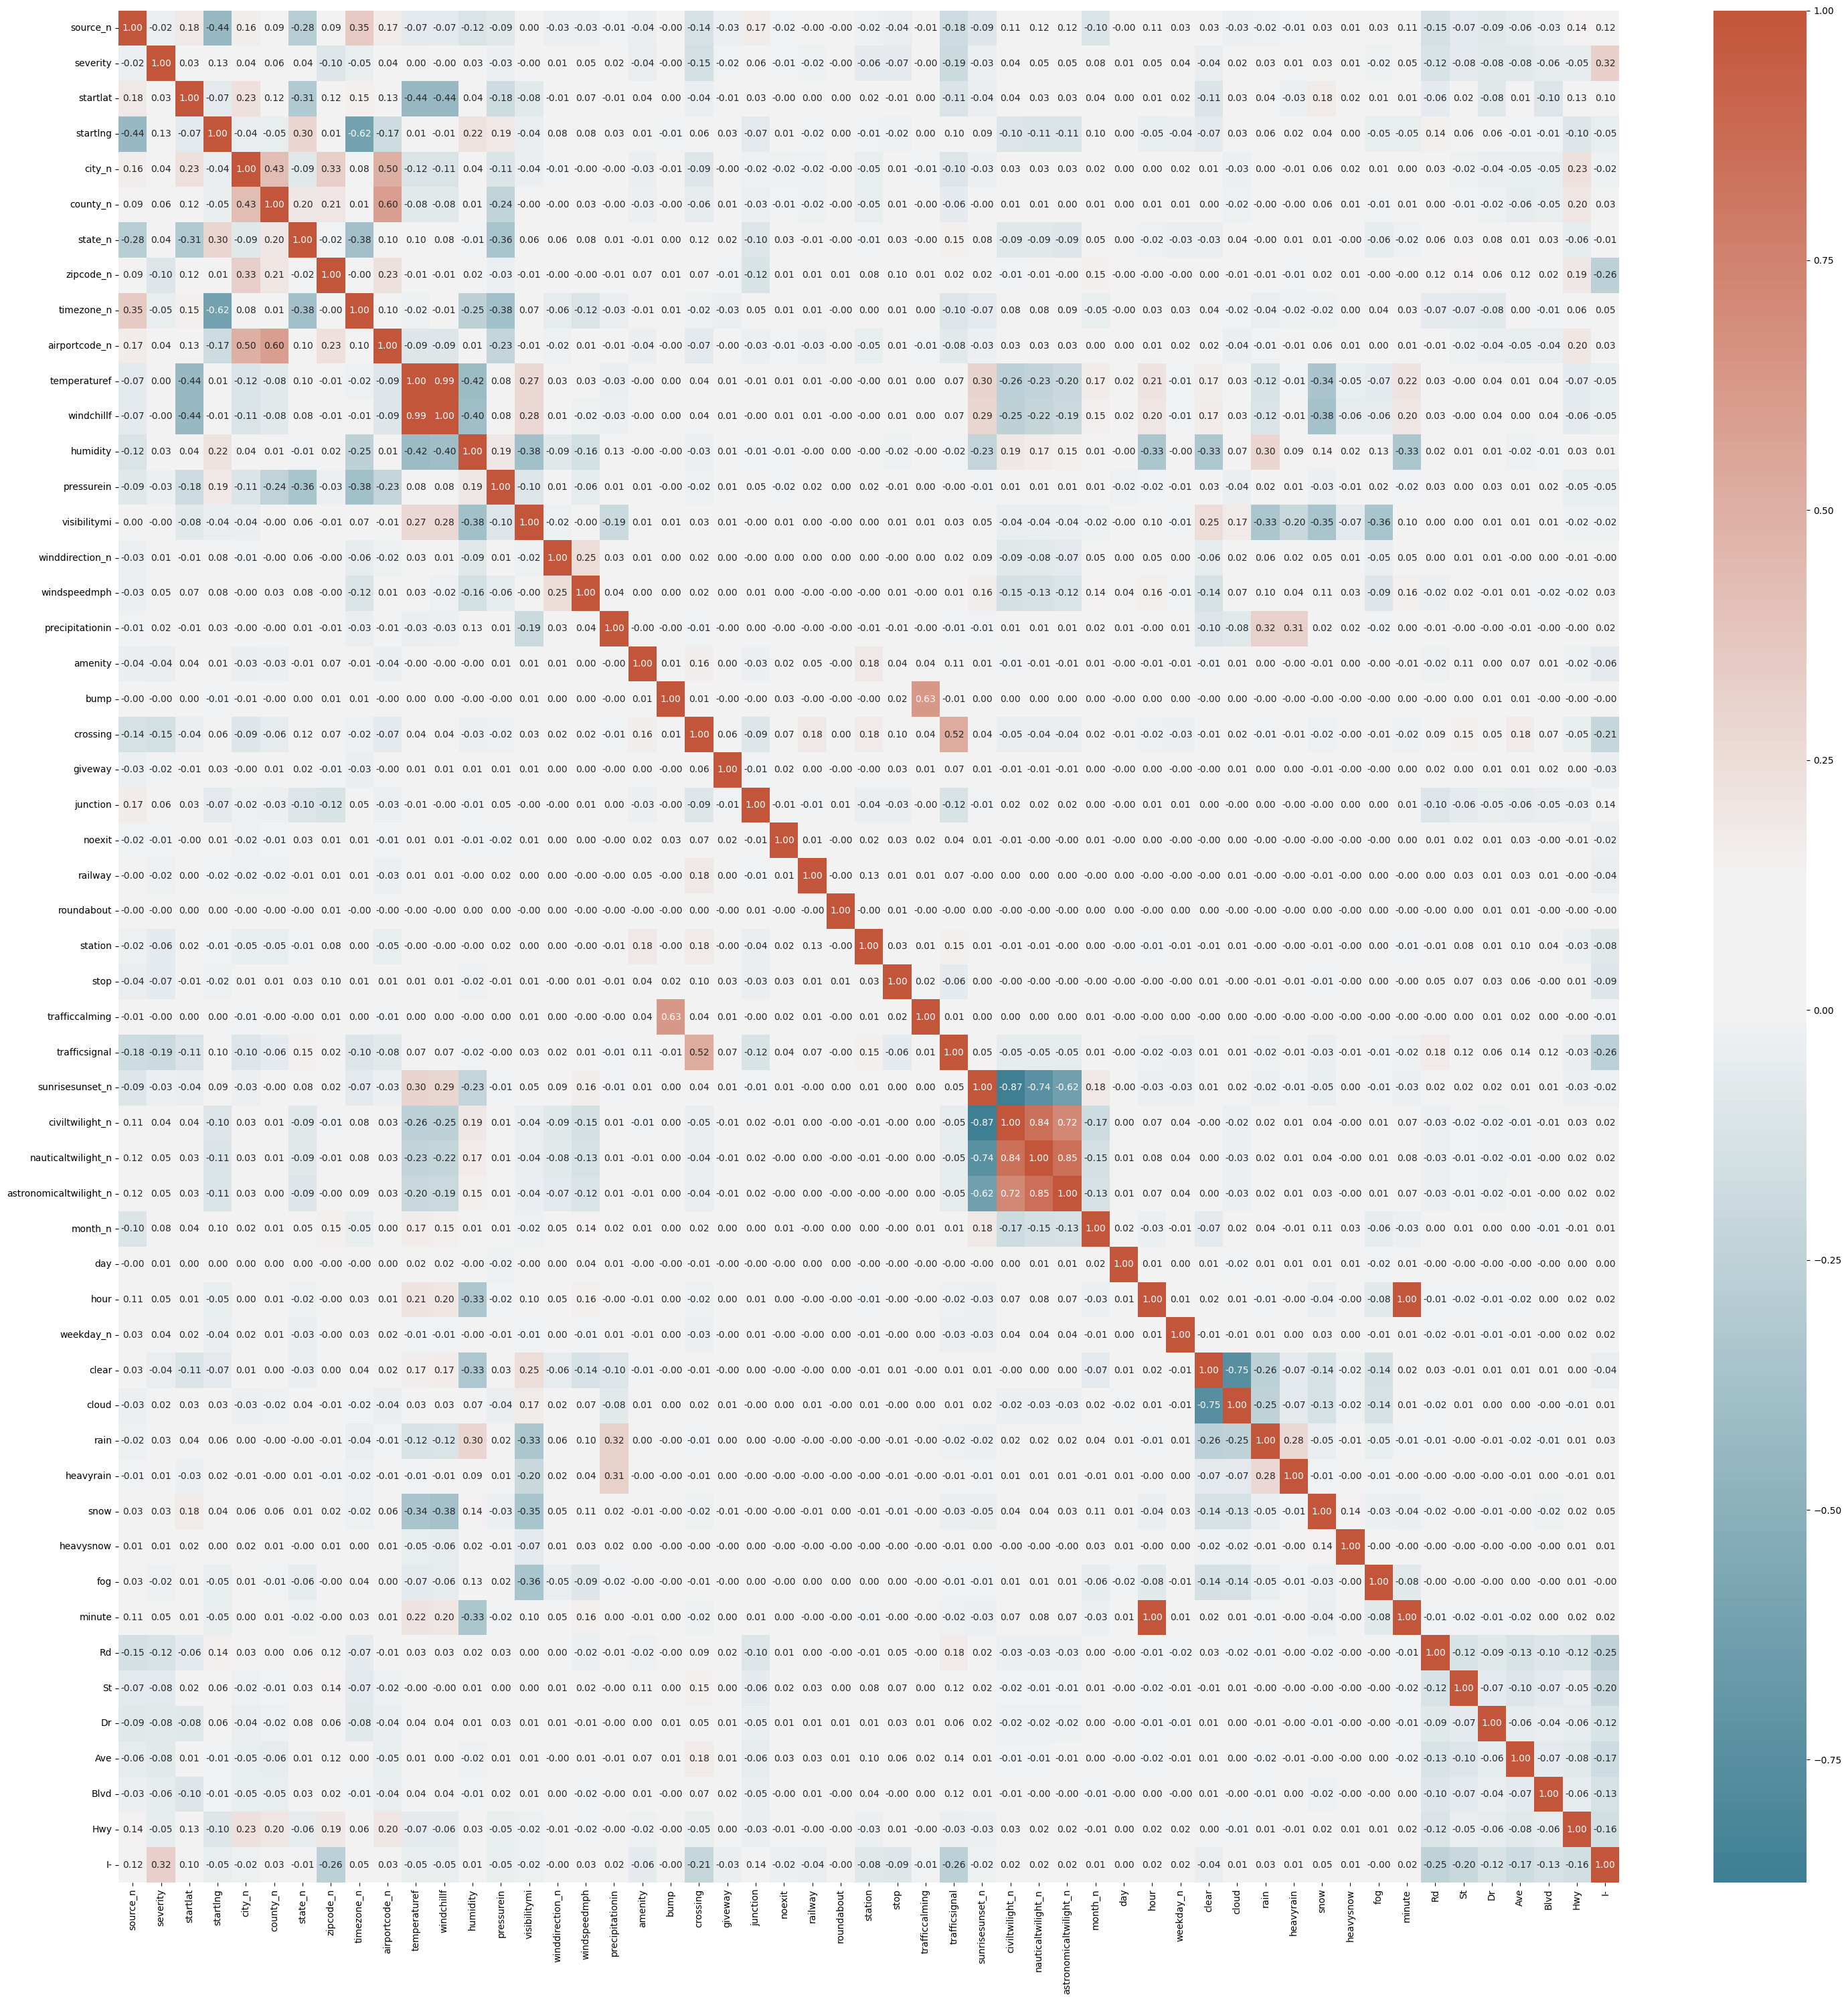

In [54]:
# Heatmap of the DataSet

# Create a Subset of the Data 

dataheat = [ 
        'source_n', 'severity', 'startlat', 'startlng',
        'city_n', 'county_n', 'state_n', 'zipcode_n', 'timezone_n',
        'airportcode_n', 'temperaturef', 'windchillf', 'humidity', 
        'pressurein', 'visibilitymi', 'winddirection_n', 'windspeedmph',
        'precipitationin', 'amenity', 'bump', 'crossing', 'giveway',
        'junction', 'noexit', 'railway', 'roundabout', 'station', 
        'stop', 'trafficcalming', 'trafficsignal', 'sunrisesunset_n',
        'civiltwilight_n', 'nauticaltwilight_n', 'astronomicaltwilight_n',
        'month_n', 'day', 'hour', 'weekday_n', 'clear', 'cloud', 'rain',
        'heavyrain', 'snow', 'heavysnow', 'fog', 'minute', 'Rd', 'St', 'Dr',
        'Ave', 'Blvd', 'Hwy', 'I-'
]

# Draw figure
fig, axis = plt.subplots(figsize=(30,30))

# Plot Heatmap
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(df[dataheat].corr(), annot=True, cmap=cmap, fmt='.2f')

#Adjust Plot
plt.tight_layout()

#Show Plot
plt.show()

Looking at the correlation between many of these variables, we can conclude there's a lot of unecessary repetetive data columns. Following this observation, we are going to drop several features that will not help or nudge our future models. 

#### Drop Features

In [55]:
# Drop unecessary features

df = df.drop(
    ['source', 'source_n', 'county', 'county_n', 'zipcode', 'zipcode_n', 'timezone', 'timezone_n', 'airportcode', 'airportcode_n', 
     'windchillf', 'year', 'civiltwilight', 'civiltwilight_n', 'nauticaltwilight', 
     'nauticaltwilight_n','astronomicaltwilight','astronomicaltwilight_n', 'hour'], axis=1)

- We exlcuded year, as our data is all related to 2019, so it's not needed to be included. 
- We excluded Source because the Source has no relation to the causality of the Severity. 
- We excluded airportcode, county, zipcode and timezone as they are location features that are being repeated when we already have that information on other Features more important as in State, Latitude, Longitude. 
- Civil, Nautical and Astronomial twilights are the same information as Sunrise Sunset, so we just keep one for the sake of simplicity. Month and Weekday also shown very little correlation to anything. 
- We decided to not include Windchillf as this measure is nothing but the junction of temperature, humidity and wind which we already have in our data. 
- We also removed minute, because it only keeps the minute information of when the accident happened. 

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 703448 entries, 0 to 954301
Data columns (total 50 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   severity         703448 non-null  int64         
 1   starttime        703448 non-null  datetime64[ns]
 2   startlat         703448 non-null  float64       
 3   startlng         703448 non-null  float64       
 4   city             703448 non-null  object        
 5   state            703448 non-null  object        
 6   temperaturef     703448 non-null  float64       
 7   humidity         703448 non-null  float64       
 8   pressurein       703448 non-null  float64       
 9   visibilitymi     703448 non-null  float64       
 10  winddirection    703448 non-null  object        
 11  windspeedmph     703448 non-null  float64       
 12  precipitationin  703448 non-null  float64       
 13  amenity          703448 non-null  int64         
 14  bump             703448 n

In [57]:
# Save Clean DataSet 
df.to_csv('../data/processed/US_Accidents_2019_Clean.csv')

In [58]:
from sklearn.preprocessing import StandardScaler

num_variables = ['city_n', 'state_n', 
       'winddirection_n', 'sunrisesunset_n', 'month_n',
       'weekday_n', "startlat", "startlng", 'temperaturef', 'humidity', 'pressurein', 'visibilitymi',
       'windspeedmph', 'precipitationin', 'amenity', 'bump',
       'crossing', 'giveway', 'junction', 'noexit', 'railway', 'roundabout',
       'station', 'stop', 'trafficcalming', 'trafficsignal', 'day', 'minute', 'clear', 'cloud', 'rain',
       'heavyrain', 'snow', 'heavysnow', 'fog', 'Rd', 'I-', 'St', 'Dr', 'Ave', 'Blvd'
       ]

scaler = StandardScaler()
norm_features = scaler.fit_transform(df[num_variables])
df_norm = pd.DataFrame(norm_features, index = df.index, columns = num_variables)
df_norm['severity'] = df['severity']
df_norm.head()

,city_n,state_n,winddirection_n,sunrisesunset_n,month_n,weekday_n,startlat,startlng,temperaturef,humidity,...,snow,heavysnow,fog,Rd,I-,St,Dr,Ave,Blvd,severity
0,-0.702229,-1.542563,-1.192039,-1.715281,-1.409856,-1.307428,0.844628,0.037061,-1.847955,0.891948,...,-0.155519,-0.022659,-0.162235,-0.427645,1.713659,-0.345061,-0.206912,-0.294694,-0.225714,3
1,-0.702229,-1.542563,-1.192039,-1.715281,-1.409856,-1.307428,0.845607,0.037161,-1.847955,0.891948,...,-0.155519,-0.022659,-0.162235,-0.427645,1.713659,-0.345061,-0.206912,-0.294694,-0.225714,3
2,-0.701471,-1.445538,-0.823525,-1.715281,-1.409856,-0.816256,1.136461,0.770145,-2.013250,1.202368,...,-0.155519,-0.022659,-0.162235,-0.427645,-0.583547,-0.345061,-0.206912,-0.294694,-0.225714,3
3,-0.701471,-1.445538,-0.823525,-1.715281,-1.409856,-0.816256,1.153748,0.769119,-2.013250,1.202368,...,-0.155519,-0.022659,-0.162235,-0.427645,-0.583547,-0.345061,-0.206912,-0.294694,-0.225714,2
4,-0.700713,-1.348513,-0.823525,-1.715281,-1.409856,-0.816256,0.613824,1.220923,-1.186773,-0.527117,...,-0.155519,-0.022659,-0.162235,-0.427645,-0.583547,-0.345061,-0.206912,-0.294694,-0.225714,2


In [59]:
# Save Clean DataSet 
df.to_csv('../data/processed/US_Accidents_2019_Clean_n.csv')

## Model Training

#### Train Test Split

In [60]:
# Create Datasets for each type
data1 = df_norm[df_norm['severity'] == 1]
data2 = df_norm[df_norm['severity'] == 2]
data3 = df_norm[df_norm['severity'] == 3]
data4 = df_norm[df_norm['severity'] == 4]

# Import SKLearn to Split
from sklearn.model_selection import train_test_split

X = data1.drop('severity', axis = 1)
y = data1['severity']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.3, random_state = 42)

X = data2.drop('severity', axis = 1)
y = data2['severity']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.3, random_state = 42)

X = data3.drop('severity', axis = 1)
y = data3['severity']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.3, random_state = 42)

X = data4.drop('severity', axis = 1)
y = data4['severity']

X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [61]:
# Concatenate the Datasets
X_train = pd.concat([X_train1, X_train2, X_train3, X_train4], ignore_index=True)
X_test = pd.concat([X_test1, X_test2, X_test3, X_test4], ignore_index=True)
y_train = pd.concat([y_train1, y_train2, y_train3, y_train4], ignore_index=True)
y_test = pd.concat([y_test1, y_test2, y_test3, y_test4], ignore_index=True)



In [62]:
# Save Train and Test Data 
X_train.to_csv('../data/processed/usaccidents_xtrain.csv', index=False)
X_test.to_csv('../data/processed/usaccidents_xtest.csv', index=False)
y_train.to_csv('../data/processed/usaccidents_ytrain.csv', index=False)
y_test.to_csv('../data/processed/usaccidents_ytest.csv', index=False)

In [63]:
# Load Model Training Packages

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import gc
from pickle import dump

# Clean garbage
gc.collect()


0

### Logistic Regression

In [64]:
# Logistic Regression Model Training
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train.values.ravel())
y_pred = lr_model.predict(X_test)
print(f'The Accuracy of the Logistic Regression is: {accuracy_score(y_test, y_pred)*100}%')

The Accuracy of the Logistic Regression is: 77.47303777554541%


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
# # Define the Hyperparameters
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],
#     'penalty': ['l1', 'l2'],
#     'solver': ['liblinear'] 
# }

# # Crear the Model
# model = LogisticRegression()

# # Create GridSearchCV
# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train.values.ravel())

# # Get best Model and Parameters
# best_model = grid_search.best_estimator_
# best_params = grid_search.best_params_

# # Retrain the model
# y_pred = best_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)

# # Imprimir los resultados
# print(f'Best Hyperparameters:, {best_params}')
# print(f'The Accuracy of the Grid Logistic Regression is: {accuracy*100}%')

#### Boosting the Logistic Regression

### Random Forest


In [66]:
# Create the Base Models
rf_model = RandomForestClassifier(random_state=42)

# Train the Model
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(f'The Accuracy of the Random Forest is: {accuracy_score(y_test, y_pred)*100}%')

The Accuracy of the Random Forest is: 82.8062510661688%


In [67]:
# Save Model 
from pickle import dump

dump(rf_model, open('../models/randomforest_default_42.sav', 'wb'))

In [68]:
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from sklearn.model_selection import GridSearchCV

# # Define the hyperparameter grid for each model
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [5, 10, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2'],
# }

# # Create the GridSearchCV object
# grid_search = GridSearchCV(rf_model, param_grid=param_grid, cv=5, n_jobs=-1)

# # Fit the GridSearchCV object to the data
# grid_search.fit(X_train, y_train)

# # Get the best parameters and the best model
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# print(best_params)
# print(best_model)


All the parameters are the default ones, minus n_estimator who recomends to be increased from the default 100 to 200. 

In [69]:
# Retrain Model with HyperParam

# Create the Base Models
rf_model = RandomForestClassifier(random_state=42, n_estimators=200)

# Train the Model
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(f'The Accuracy of the Random Forest is: {accuracy_score(y_test, y_pred)*100}%')

The Accuracy of the Random Forest is: 82.89012301218749%


In [70]:
# Save Model 
from pickle import dump

dump(rf_model, open('../models/randomforest_boost_default_42.sav', 'wb'))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


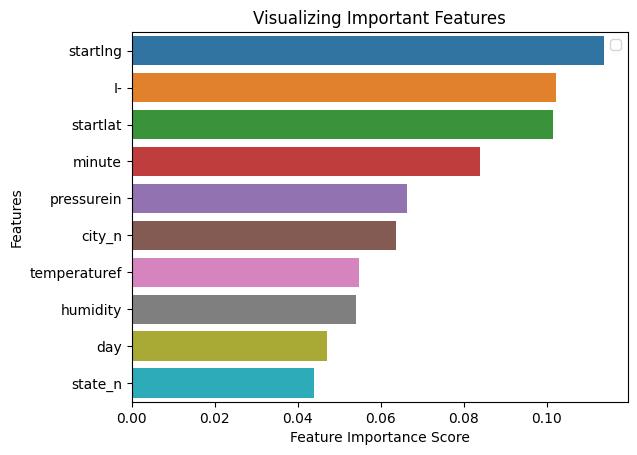

In [71]:
# Visualize the most important features of our Model
feature_imp = pd.Series(rf_model.feature_importances_,index=X.columns).sort_values(ascending=False)

# Creating a bar plot, displaying only the top k features
k=10
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:k])

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.legend()
plt.show()

In [72]:
# List the 20 more important features and their weight. 
k=20
feature_imp.sort_values(ascending=False)[:k]

startlng           0.113845
I-                 0.102286
startlat           0.101570
minute             0.083984
pressurein         0.066335
city_n             0.063708
temperaturef       0.054708
humidity           0.053962
day                0.046996
state_n            0.043963
month_n            0.039339
windspeedmph       0.038202
weekday_n          0.031183
winddirection_n    0.029309
trafficsignal      0.022736
visibilitymi       0.014414
crossing           0.011442
Rd                 0.010517
junction           0.007749
cloud              0.007485
dtype: float64

We can observe quite a few interesting points here: 

- Startlng/Startlat are a big factor in the severity of accidents. Which means that the location / type of road / quality of the road, highway, street, etc.. will have an extreme influence over the severity. These are more specific location points than state or city as we can see, so the more accurate and detailed the location we can see that the 'roads' are a big influence to the severity. 
- We also see that I- (Innerstate) type of road is prone to more severe accidents. 
- Pressure and Temperature (for sure cold / freezing ones) also plays a role here. Which means that afterall the climateric conditions do end up playing a role on the severity of the accidents, which is something we know that can factor in. 
- Hour also plays a role, Day / Night can play a role in the severity, as it's known for all drivers. 
- We also see that Traffic Signals, Crossings and Junctions are also quite prone to the severity, as they can sometimes lead to higher severity, due to induce hardship to less skilled or distracted drivers.

#### XGBoost (Gradient Boosting)

In [73]:
from xgboost import XGBClassifier

xg_model = XGBClassifier(random_state = 42, num_class=4)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train2 = le.fit_transform(y_train)
y_test2 = le.fit_transform(y_test)

xg_model.fit(X_train, y_train2)
y_pred = xg_model.predict(X_test)
print(f'The Accuracy of the XGBClassifier is: {accuracy_score(y_test2, y_pred)*100}%')

The Accuracy of the XGBClassifier is: 82.34424458386246%


In [74]:
# Save Model 

xg_model.save_model('../models/xgb_default_42.json')